## Target 
#### - Factors influence the clients to Term Deposit 

In [1]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

# view max rows and columns 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
# lets import the data 
data =pd.read_csv("bank.csv")

# check the dimensions of the data 
print(f"The bank data had {data.shape[0]}rows and {data.shape[1]}columns")

The bank data had 11162rows and 17columns


In [3]:
# lets understand the data first 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# lets seperate the numerical and categorical columns 
nums_cols = []
cats_cols = []
for cols in data.columns:
    if data[cols].dtype != "O":
        nums_cols.append(cols)
    elif data[cols].dtype == "O":
        cats_cols.append(cols)
# lets check the count and the values of the numerical and categorical columns 
print(f"The bank data had {len(nums_cols)} numerical columns and {len(cats_cols)} categorical columns")
print(f"The numerical columns are {nums_cols} \ncategorical columns {cats_cols}")

The bank data had 7 numerical columns and 10 categorical columns
The numerical columns are ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 
categorical columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [5]:
# checking the unique values in the categorical columns and numerical columns  
print("Categorical columns and its unique values")
print("-------------------------------------------")
for cols in data.columns:
    if data[cols].dtype == "O":
        print(cols,":",data[cols].unique())
        
print("===============================")

# print("Numerical columns and its unique values")
# print("-------------------------------------------")
# for cols in data.columns:       
#     if data[cols].dtype != "O":                                   # uncomment this and check the output as the output may looks messy 
#         print(cols,":",data[cols].unique())

Categorical columns and its unique values
-------------------------------------------
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'other' 'failure' 'success']
deposit : ['yes' 'no']


###  data dictionery 

### Categorical columns 
- job        > jobs of the clients ('admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
                                    'unemployed' 'entrepreneur' 'housemaid''unknown' 'self-employed' 'student')
- marital    > marital status of clients ('married' 'single' 'divorced')
- education  > education status of clients (primary ,secondary , tertiary , unknown)
- default    > any default on credit ( 'no' 'yes')
- housing    > had any housing loan ('yes' 'no' )
- loan       > had any loan ('yes' 'no' )
- contact    > mode of contact with clients ('unknown' 'cellular' 'telephone')
- month      > last contact month ('may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep')
- poutcome   > outcome of the previous marketing campaign ('unknown' 'other' 'failure' 'success')
- deposit    > status of clients deposit ('yes' 'no')

### Numerical columns
- age        > age of the clients
- duration   > last contact duration, in seconds
- balance    > avg yearly bank balance of the client
- campaign   > number of contacts performed during this campaign
- day        > last contact day of the month
- previous   > number of contacts performed before this campaign and for this client
- pdays      > number of days that passed by after the client was last contacted from a previous campaign

## data cleaning 

In [6]:
# data cleaning 
a=pd.DataFrame({"datatype":data.dtypes,
              "missing values":data.isnull().sum(),
              "duplicates":data.duplicated().sum()})
b=data.head(2).T
b.rename(columns={0:"sample_1",1:"sample_2"},inplace =True)
pd.concat([a,b],axis =1)

# we observe the data had no duplicates and no missing values.      # cleaned data 
# all the data types of the each column is ok                       # correct datatypes 

,datatype,missing values,duplicates,sample_1,sample_2
age,int64,0,0,59,56
job,object,0,0,admin.,admin.
marital,object,0,0,married,married
education,object,0,0,secondary,secondary
default,object,0,0,no,no
balance,int64,0,0,2343,45
housing,object,0,0,yes,no
loan,object,0,0,no,no
contact,object,0,0,unknown,unknown
day,int64,0,0,5,5


## Analyzing the data

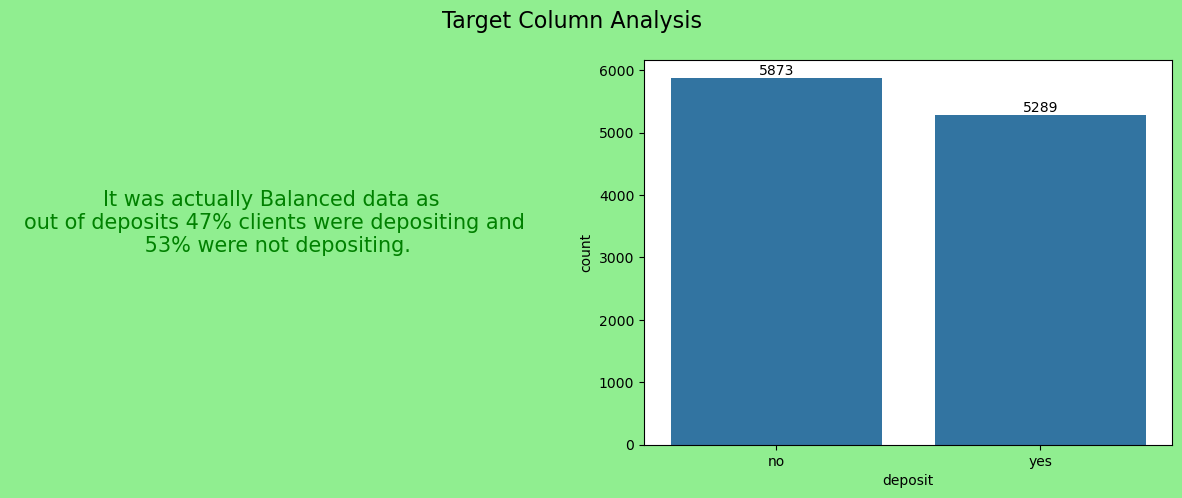

In [7]:
#lets analyze the target column
fig ,axes = plt.subplots(1,2,figsize=(15,5))
axes = axes.flatten()
fig.patch.set_facecolor('lightgreen')
# graph
ax=sns.countplot(data = data ,x = "deposit" , order = data["deposit"].value_counts().index  , ax = axes[1])
ax.bar_label(ax.containers[0])

# text
fig.suptitle("Target Column Analysis", fontsize=16)
axes[0].axis('off')
axes[0].text(0.5, 0.5, "It was actually Balanced data as \nout of deposits 47% clients were depositing and\n 53% were not depositing.",fontsize=15, color='green', ha='center')
plt.tight_layout(rect=[0.5,0.5,0.5,0.5])
plt.show()

## Univariate analysis on Numerical columns 

In [8]:
# lets understand the age column 
print(data["age"].describe())


bins = [data['balance'].min() - 1,1,1708,3000,5000,10000,20000,30000,40000,50000,60000,80000,np.inf]
labels  = ["min_bal","1-1708","1709-3000","3001-5000","5001-10000","10001-20000","20001-30000","30000-40000","40001-50000","50001-60000","60000-80000","80001+"]
a=pd.cut(data["balance"] , bins = bins , labels= labels , right = True , include_lowest = True )
a.value_counts(sort =False)


count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


balance
min_bal        1501
1-1708         6871
1709-3000      1212
3001-5000       807
5001-10000      543
10001-20000     171
20001-30000      41
30000-40000       8
40001-50000       1
50001-60000       4
60000-80000       1
80001+            2
Name: count, dtype: int64

In [9]:
# lets analyze the balance 
print(data["balance"].describe())
print(f"80%        :{round(data["balance"].quantile(0.80))}")
print(f"90%        :{round(data["balance"].quantile(0.90))}")
print(f"95%        :{round(data["balance"].quantile(0.95))}")
print(f"97%        :{round(data["balance"].quantile(0.97))}")
print(f"98%        :{round(data["balance"].quantile(0.98))}")
print(f"99%        :{round(data["balance"].quantile(0.99))}")
print(f"99.5%        :{round(data["balance"].quantile(0.995))}")
print(f"99.6%        :{round(data["balance"].quantile(0.996))}")
print(f"99.7%        :{round(data["balance"].quantile(0.997))}")
print(f"99.8%        :{round(data["balance"].quantile(0.998))}")
print(f"99.9%        :{round(data["balance"].quantile(0.999))}")

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64
80%        :2223
90%        :3898
95%        :6026
97%        :8090
98%        :10086
99%        :13227
99.5%        :20036
99.6%        :22100
99.7%        :23545
99.8%        :27696
99.9%        :34579


In [10]:
# lets understand the count of clients in different balance range 
balance_less_than_zero = []
balance_equal_to_zero  = []
balance_more_than_zero = []
balance_more_than_1708 = []

# lets loop the data
for i in data["balance"]:
    if i < 0:
        balance_less_than_zero.append(i)
    elif  i == 0:
        balance_equal_to_zero.append(i)
    elif (i > 0) & (i <= 1708):
        balance_more_than_zero.append(i)
    elif i > 1708:
        balance_more_than_1708.append(i)
print(f"Number of clients with negative balance { len(balance_less_than_zero)}")
print(f"Number of clients with zero balance { len(balance_equal_to_zero)}")
print(f"Number of clients with positive & upto 1708 balance :{len(balance_more_than_zero)}")
print(f"Number of clients with more than 1708 balance { len(balance_more_than_1708)}")



print("==========================")
# lets understand more about the positive values 

bins = [1,1708,3000,5000,10000,20000,30000,40000,50000,60000,80000,np.inf]
labels  = ["1-1708","1709-3000","3001-5000","5001-10000","10001-20000","20001-30000","30000-40000","40001-50000","50001-60000","60000-80000","80001+"]
a=pd.cut(data["balance"] , bins = bins , labels= labels , right = True , include_lowest = True )
a.value_counts(sort =False)




Number of clients with negative balance 688
Number of clients with zero balance 774
Number of clients with positive & upto 1708 balance :6910
Number of clients with more than 1708 balance 2790


balance
1-1708         6910
1709-3000      1212
3001-5000       807
5001-10000      543
10001-20000     171
20001-30000      41
30000-40000       8
40001-50000       1
50001-60000       4
60000-80000       1
80001+            2
Name: count, dtype: int64

In [11]:
# lets analyze the duration
data["duration"].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [12]:
# lets create some bins to understand deep 
bins = [2,60,120,180,300,480,540,600,1200,1800,2400,3000,3600,np.inf]
labels = ["2-60","61-120","121-180","181-300","301-480","481-540","541-600","601-1200","1201-1800","1801-2400","2401-3000","3001-3600","3601+"]

a= pd.cut(data["duration"] , bins = bins , labels=labels , right = True , include_lowest = True )
a.value_counts(sort=False)

duration
2-60          732
61-120       1556
121-180      1648
181-300      2434
301-480      1903
481-540       389
541-600       348
601-1200     1772
1201-1800     320
1801-2400      43
2401-3000      10
3001-3600       6
3601+           1
Name: count, dtype: int64

In [13]:
# lets analyze the campaign 
data["campaign"].describe()

count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [14]:
# lets understand the campaign 
bins = [0,1,2,3,4,5,10,15,20,30,40,50,60,np.inf]
labels = ["1","2","3",'4',"5","6-10","11-15","16-20","21-30","31-40","41-50","51-60","61+"]

a=pd.cut(data["campaign"],bins =bins , labels = labels , right =True , include_lowest=True)
a.value_counts(sort =False )

campaign
1        4798
2        3028
3        1321
4         771
5         378
6-10      656
11-15     127
16-20      41
21-30      34
31-40       4
41-50       3
51-60       0
61+         1
Name: count, dtype: int64

previous
0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: count, dtype: int64


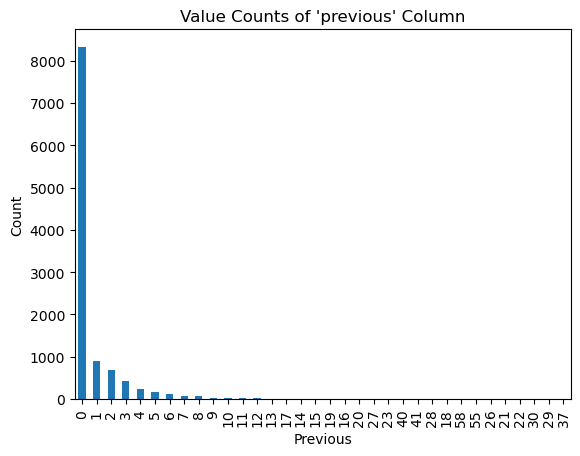

In [15]:
# lets analyse the previous
print(data["previous"].value_counts())


data["previous"].value_counts().plot(kind='bar')
plt.xlabel("Previous")
plt.ylabel("Count")
plt.title("Value Counts of 'previous' Column")
plt.show()


In [16]:
## lets analyse the pdays 
data["pdays"].describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

In [17]:
# lets deep dive into pdays 

bins = [-1,0,30,60,90,120,150,180,270,360,540,720,900]
labels = ["-1","0-30","31-60","61-90","91-120","121-150","151-180","181-270","271-360","361-540","541-720","900+"]

a=pd.cut(data["pdays"],bins = bins , labels = labels, include_lowest =True , right=True)
a.value_counts(sort =False)


pdays
-1         8324
0-30         56
31-60        49
61-90       224
91-120      581
121-150     134
151-180     235
181-270     780
271-360     486
361-540     251
541-720      24
900+         18
Name: count, dtype: int64

# Observation - Numerical columns (Univariate)
- Around 35% of clients are aged 26–35, followed by 28% in the 36–45 group.
- In total, 90% are between 26–60 — the typical working and family-responsible age group.
- Only 10% are under 18 or over 60, suggesting low interest from students and retired individuals.
- Around 62% of clients have a positive balance up to 1708 EUR, while 25% have balances above that.
- Only 16 clients hold balances over 30,000 EUR, with just 2 clients above 80,000 EURO.
- Negative and zero balances together account for nearly 13% of clients. ( have to revist with default comparision)
- Approximately 67% of client calls last 1–8 minutes, suggesting brief and routine interactions.
- Around 7% end in under 1 minute, likely due to quick rejections or failed contacts.
- Notably, 16% span 10–20 minutes, indicating more in-depth conversations or higher client interest. 
- In current campaign, approximately 70% of clients received one or two calls, with 43% receiving a single call and 27% receiving two calls.
- Only 8 clients recieved more than 30+ calls in the current campaign. (Have to compare with deposits to get better picture)
-  Approximately 75% of the clients were new, having not participated in any previous campaign (pdays = -1).
- About 10.5% of clients had not been contacted for 61 to 180 days, indicating a medium-term follow-up gap.
- Around 13.6% of clients were last contacted between 6 months to 1.5 years ago, suggesting inconsistent long-term re-engagement
- Approximately 75% of clients had no previous contact , indicating the campaign primarily targets new leads.
- A very small group (around 80 clients) had been contacted over 10 times previously, suggesting targeted follow-ups.


## Univariate analysis on Categorical columns

In [18]:
# lets do univariate analysis with category columns(numerically)

for cols in cats_cols:
    print("------------------------------")
    print(data[cols].value_counts())
    

------------------------------
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
------------------------------
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
------------------------------
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
------------------------------
default
no     10994
yes      168
Name: count, dtype: int64
------------------------------
housing
no     5881
yes    5281
Name: count, dtype: int64
------------------------------
loan
no     9702
yes    1460
Name: count, dtype: int64
------------------------------
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
------------------------------
mont

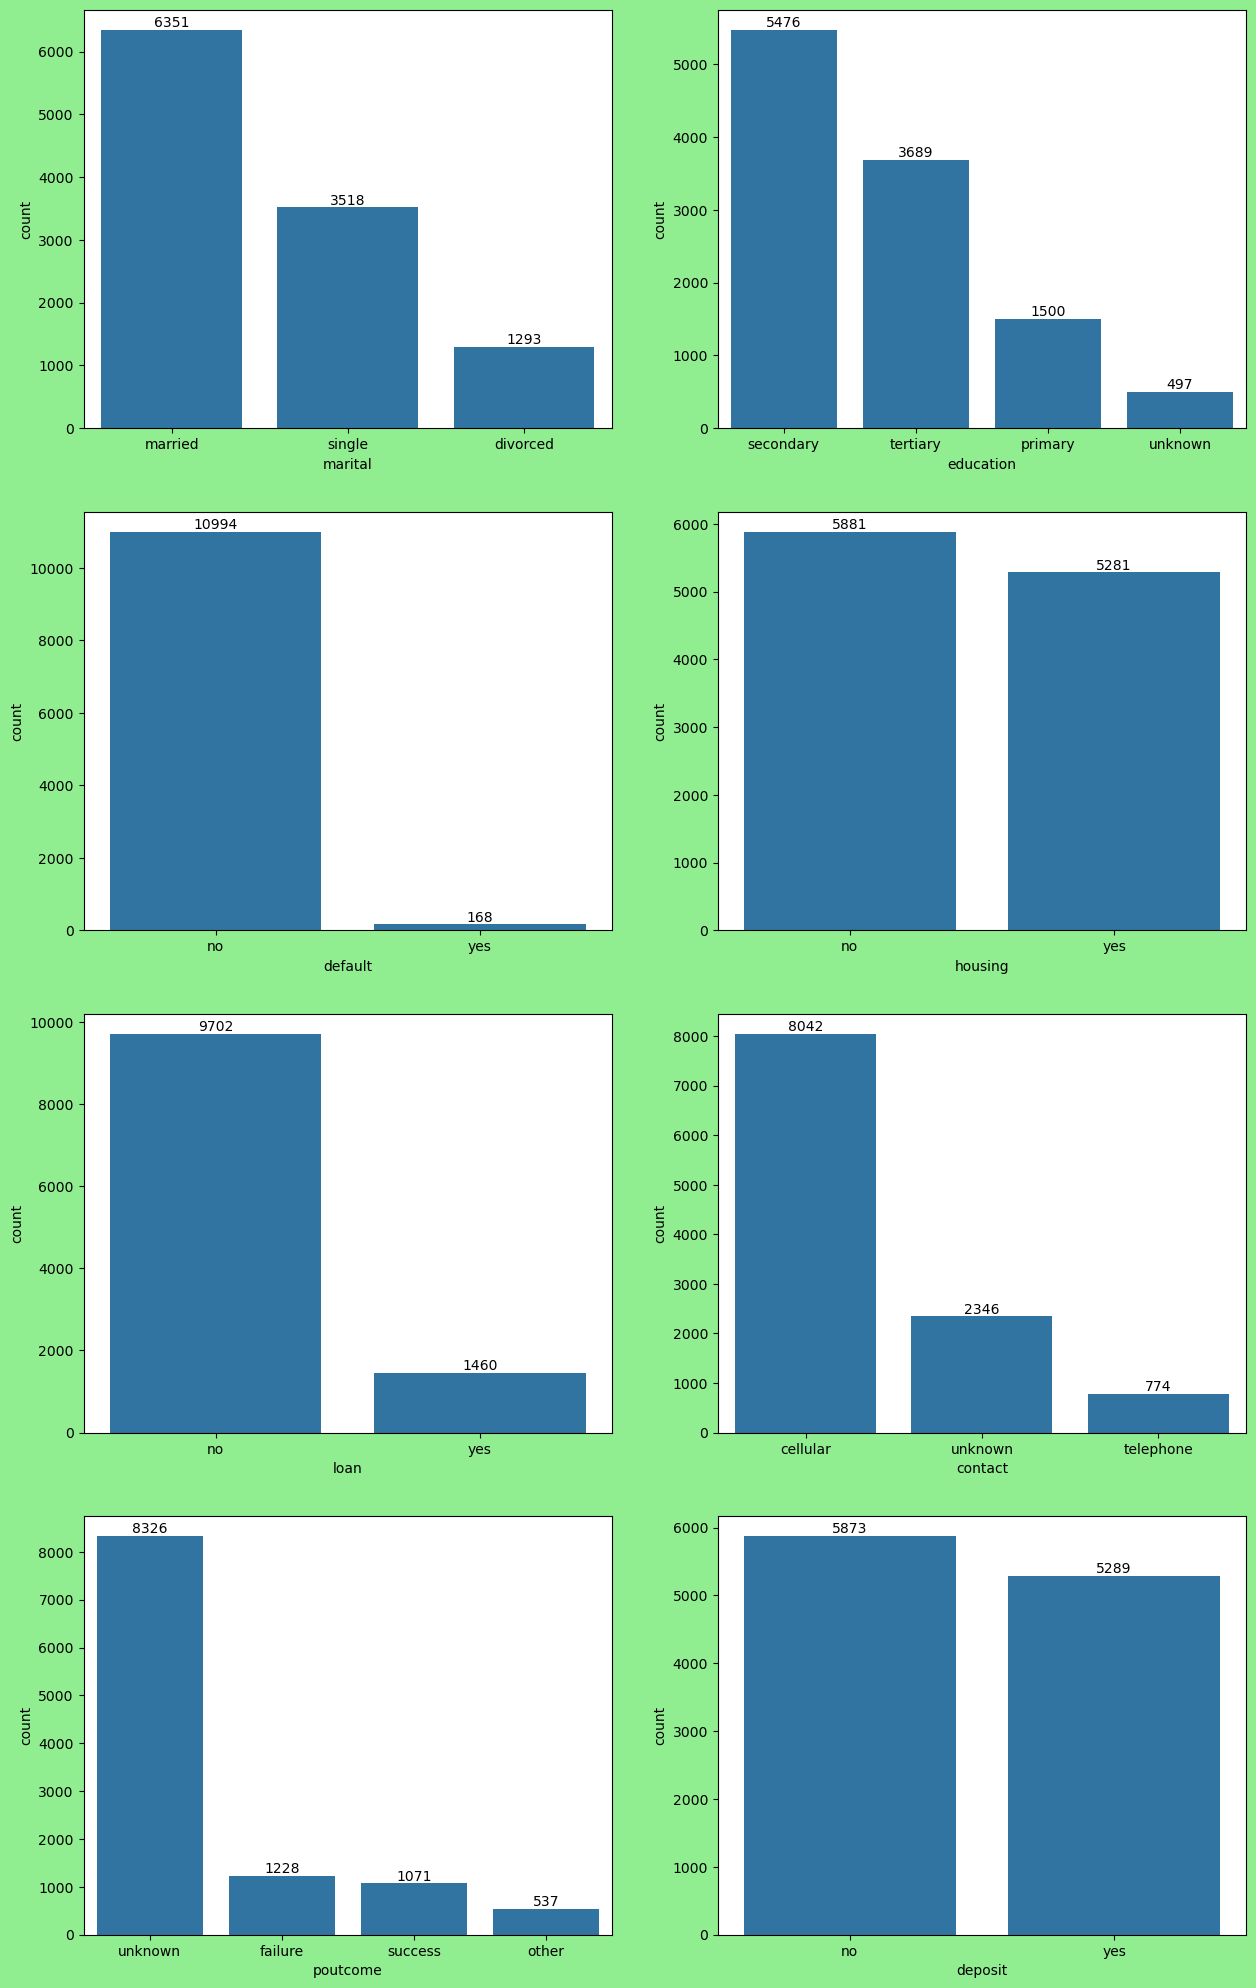

In [19]:
# lets do univariate analysis with category columns(graphically)
fig , axes = plt.subplots(4,2,figsize = (15,25))
axes = axes.flatten()
fig.patch.set_facecolor('lightgreen')

# lets create graph for category columns except job & month as they had more unique features
count_plot=0
for cols in cats_cols:
    if cols in ["job","month"]:
        continue
    else:
        bx = sns.countplot(data = data , x=data[cols],order = data[cols].value_counts().index , ax = axes[count_plot])
        bx.bar_label(bx.containers[0])
        
        count_plot+=1
plt.show()

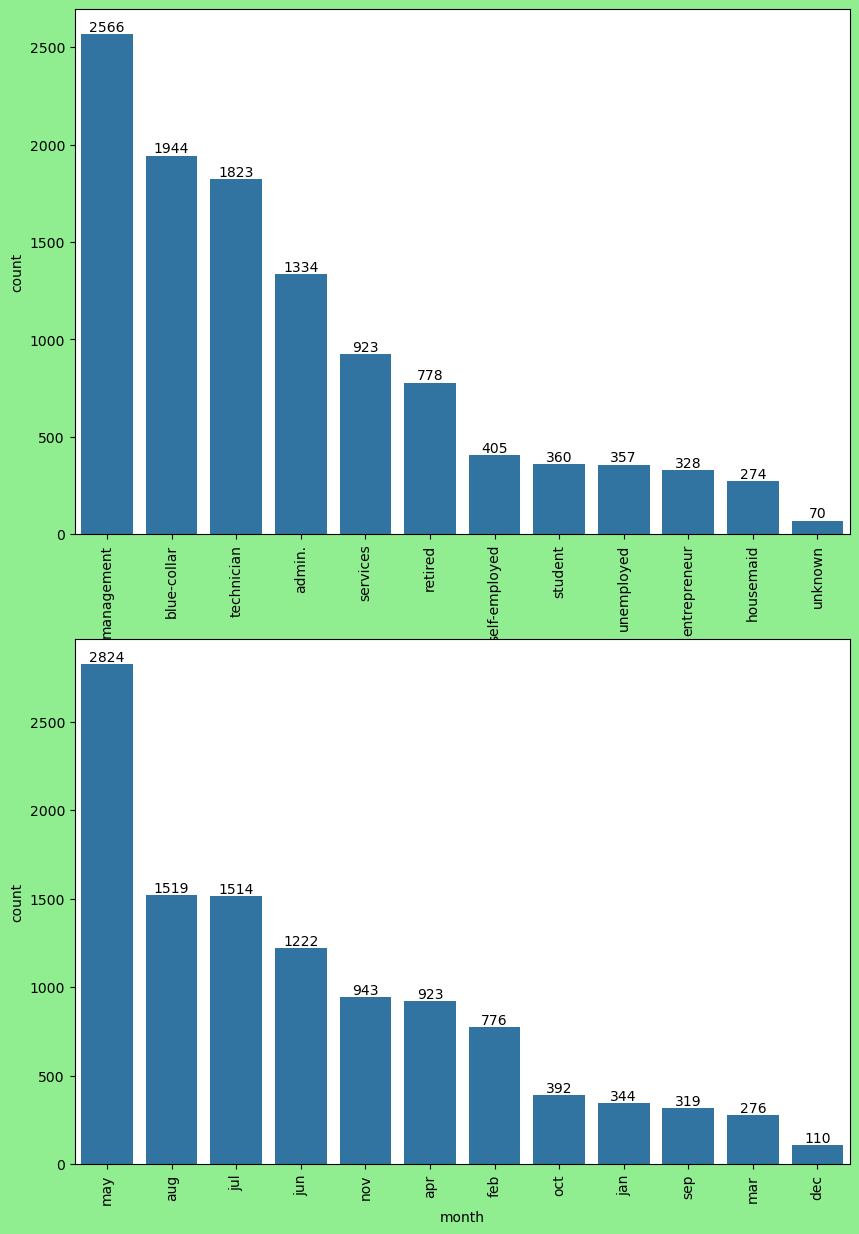

In [20]:
# lets create the graph for job and month 
fig , axes = plt.subplots(2,1,figsize = (10,15))
axes=axes.flatten()
fig.patch.set_facecolor('lightgreen')
count_plt=0
for cols in ["job","month"]:
    cx=sns.countplot(data=data, x =data[cols],order = data[cols].value_counts().index,ax=axes[count_plt])
    cx.bar_label(cx.containers[0])
    cx.tick_params(axis='x', rotation=90)
    count_plt+=1
plt.show()

# observations - Category columns (Univariate)
- Management is the most common job type, representing about 23% of clients, followed by Blue-collar (17%) and Technician (16%).
- Most clients are married (57%), with singles comprising 32% and divorced clients 12%.
- Nearly half of the clients (49%) have secondary education, followed by 33% with tertiary and 13% with primary education; 4.5% have unknown education status.
- The vast majority (99%) have no credit default history, while only 1.5% have had a default.
- Housing loan ownership is fairly balanced, with 53% having a loan and 47% without.
- Most clients (87%) do not have a personal loan; 13% do.
- Cellular phones are the primary contact method used in 72% of cases, with telephone and unknown contacts making up 7% and 21%, respectively.
- May is the most frequent month for client contact (25%), followed by August (14%) and July (14%); December has the least activity (1%).
- Previous campaign outcomes are mostly unknown (74%), with 11% failures, 10% successes, and 5% other outcomes.
- The target variable, deposit subscription, is nearly evenly split with 53% not subscribing and 47% subscribing.


## Bi-variate Analysis on Categorical columns 

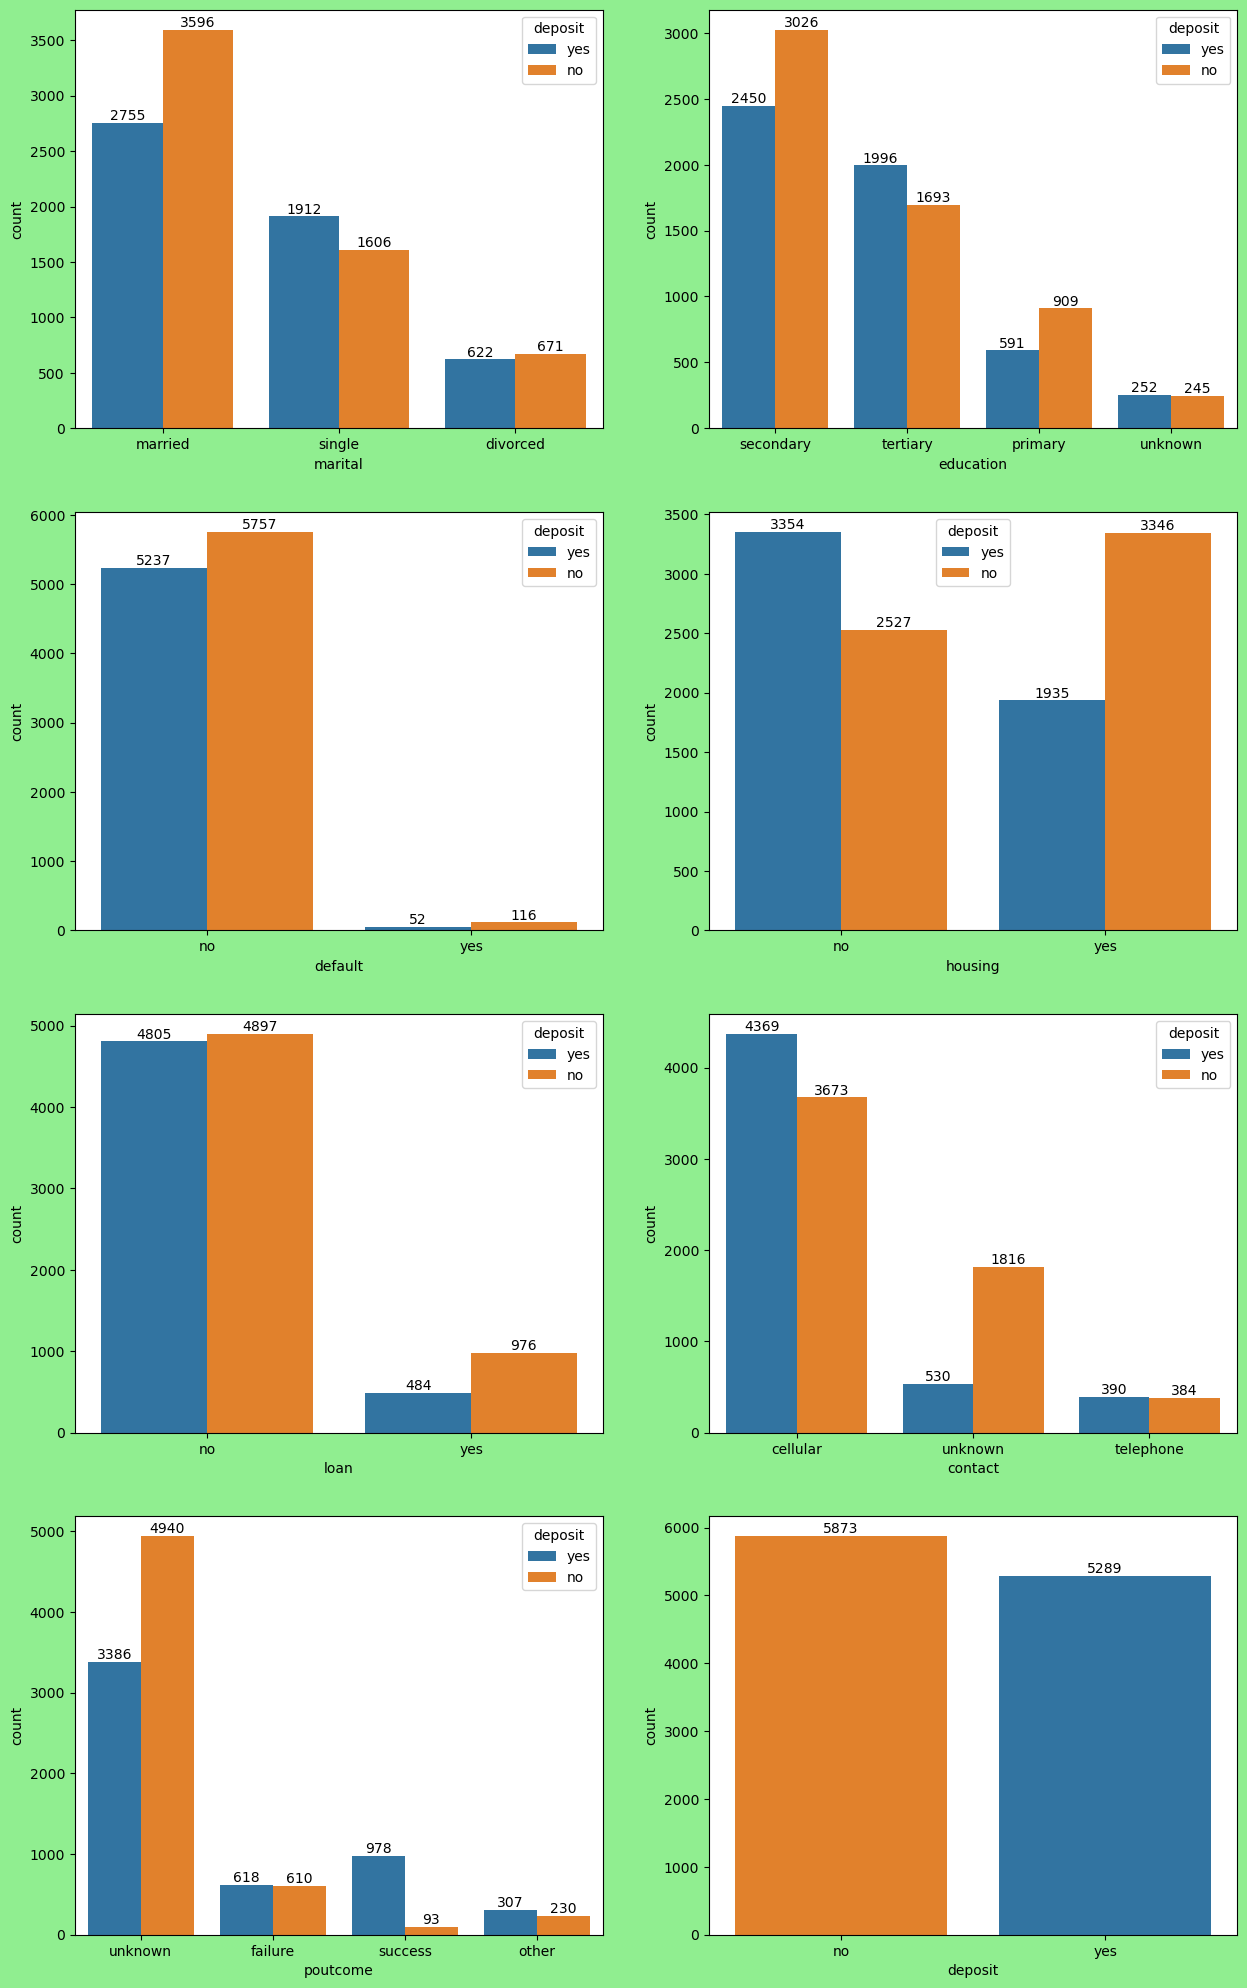

In [21]:
# lets do bivariate analysis with category columns and deposits as a target column
fig , axes = plt.subplots(4,2,figsize = (15,25))
axes = axes.flatten()
fig.patch.set_facecolor('lightgreen')
# lets create graph for category columns except job & month as they had more unique features
count_plot=0
for cols in cats_cols:
    if cols in ["job","month"]:
        continue
    else:
        bx = sns.countplot(data = data , x=data[cols],hue=data["deposit"] , order = data[cols].value_counts().index , ax = axes[count_plot])
        bx.bar_label(bx.containers[0])
        bx.bar_label(bx.containers[1])
        count_plot+=1
plt.show()

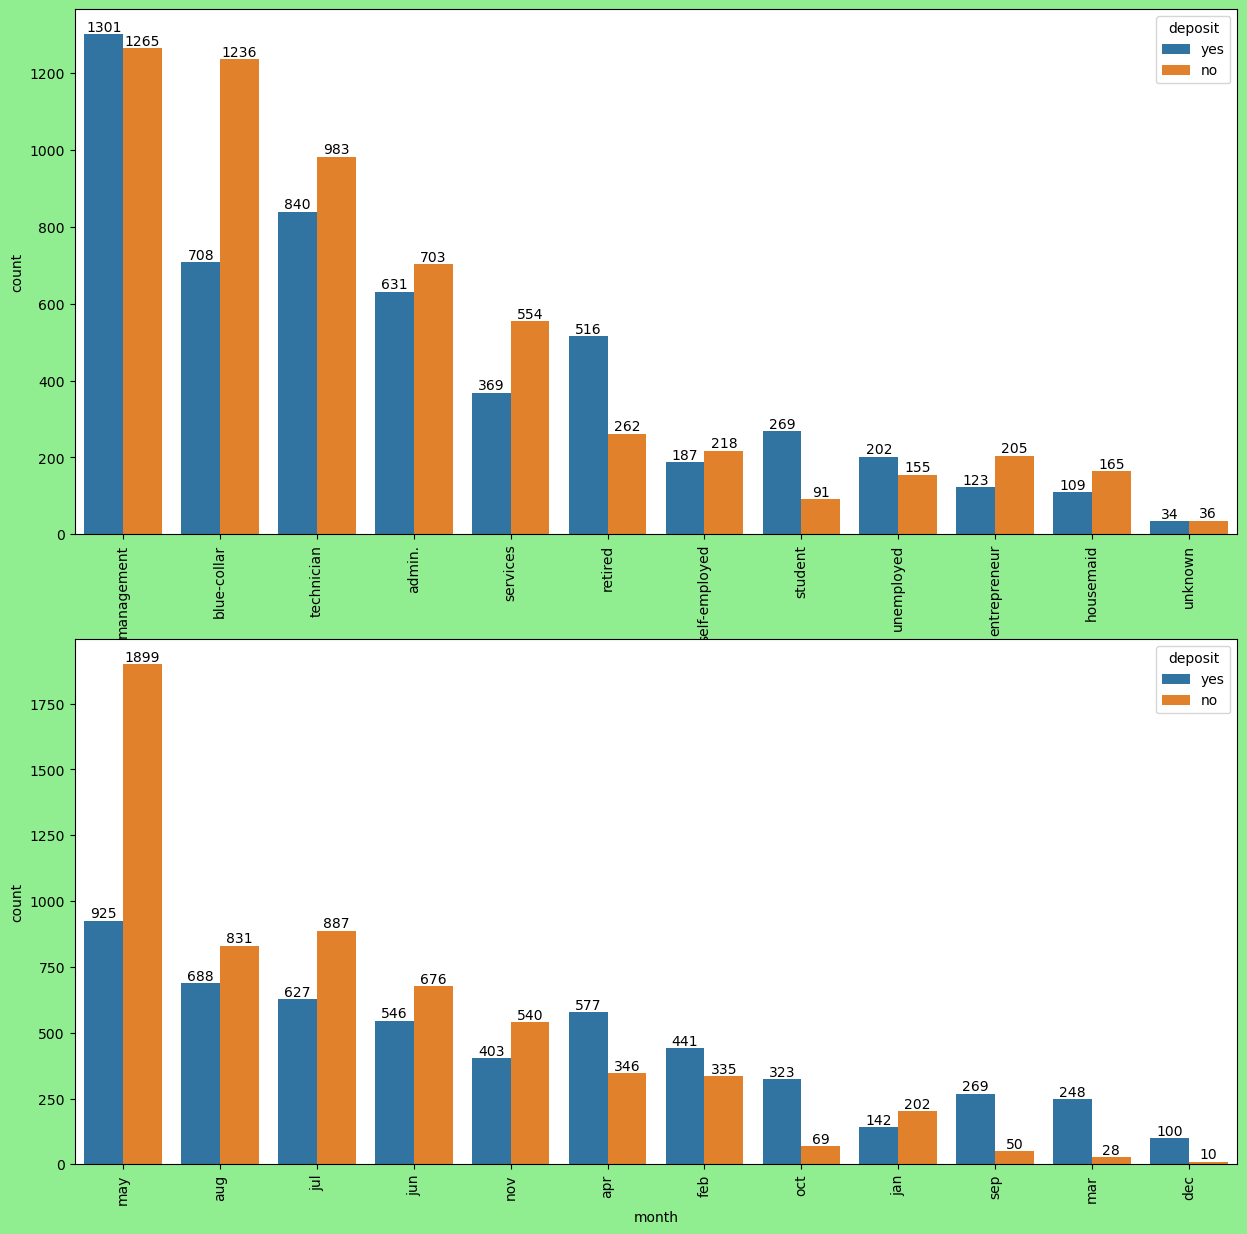

In [22]:
# lets create the graph for job and month 
fig , axes = plt.subplots(2,1,figsize = (15,15))
axes=axes.flatten()
fig.patch.set_facecolor('lightgreen')
count_plt=0
for cols in ["job","month"]:
    cx=sns.countplot(data=data, x =data[cols],hue=data["deposit"] ,order = data[cols].value_counts().index,ax=axes[count_plt])
    cx.bar_label(cx.containers[0])
    cx.bar_label(cx.containers[1])
    cx.tick_params(axis='x', rotation=90)
    count_plt+=1
plt.show()

# observations - Category columns (Bi-variate)
- Out of Total deposits, 52% were done by married clients and 36% were done by single clients.
- but the proportion is high in single clients 54% (1912 out of 3518 singles)have made deposits compared to married 43% (2755 out of6351)
  have made the deposits.In the divorced clients 52% were not in favour of deposits.
- Around 84% deposits were done by secondary and tertiary educated clients.This indicates education influence deposit decisions.
- Out of total deposist 99% of depoits were by NON_Defaulters,so clients who had past deafult experince shown less interest towards deposit.
- Clients with No-housing loan were made 63% of deposits.
- Among clients without loans, 49% made a deposit—contributing to 90% of all deposits.
- Cellular contacts resulted in 83% of deposits, suggesting this is the most effective channel.only 7% were made through Telephones.
- Cellular mode converstaions had 54% success whereas 50% in Telephone,even though just 4% difference in rate of success but the count is      too high in cellular(4369 put of 8042) and telephone(390 out of 774).
- Clients with a successful previous campaign had a 91% deposit rate, while even those with a failed outcome showed a 51% deposit rate in      the current campaign.
- Of the 8326 clients with no prior campaign participation, approximately 41% made a deposit in the current campaign.
- Clients who were in the management have made around 25% of total deposits.
- Students had high sucess rate of deposits with 74% followed by retired clients with 66% .
- Blue collar job clients had the highest rejection rate for deposits with 63% followed by technician with 54%.
- Out of total deposits,17% were made in the month of may and also 32% of rejection came in the same month,which is the most.
- Feb,Mar,Apr,Oct,Sep,Dec months have seen the most sucess rate of deposits compare with rejecting the deposits.
  


## Bi-variate Analysis on Numerical columns

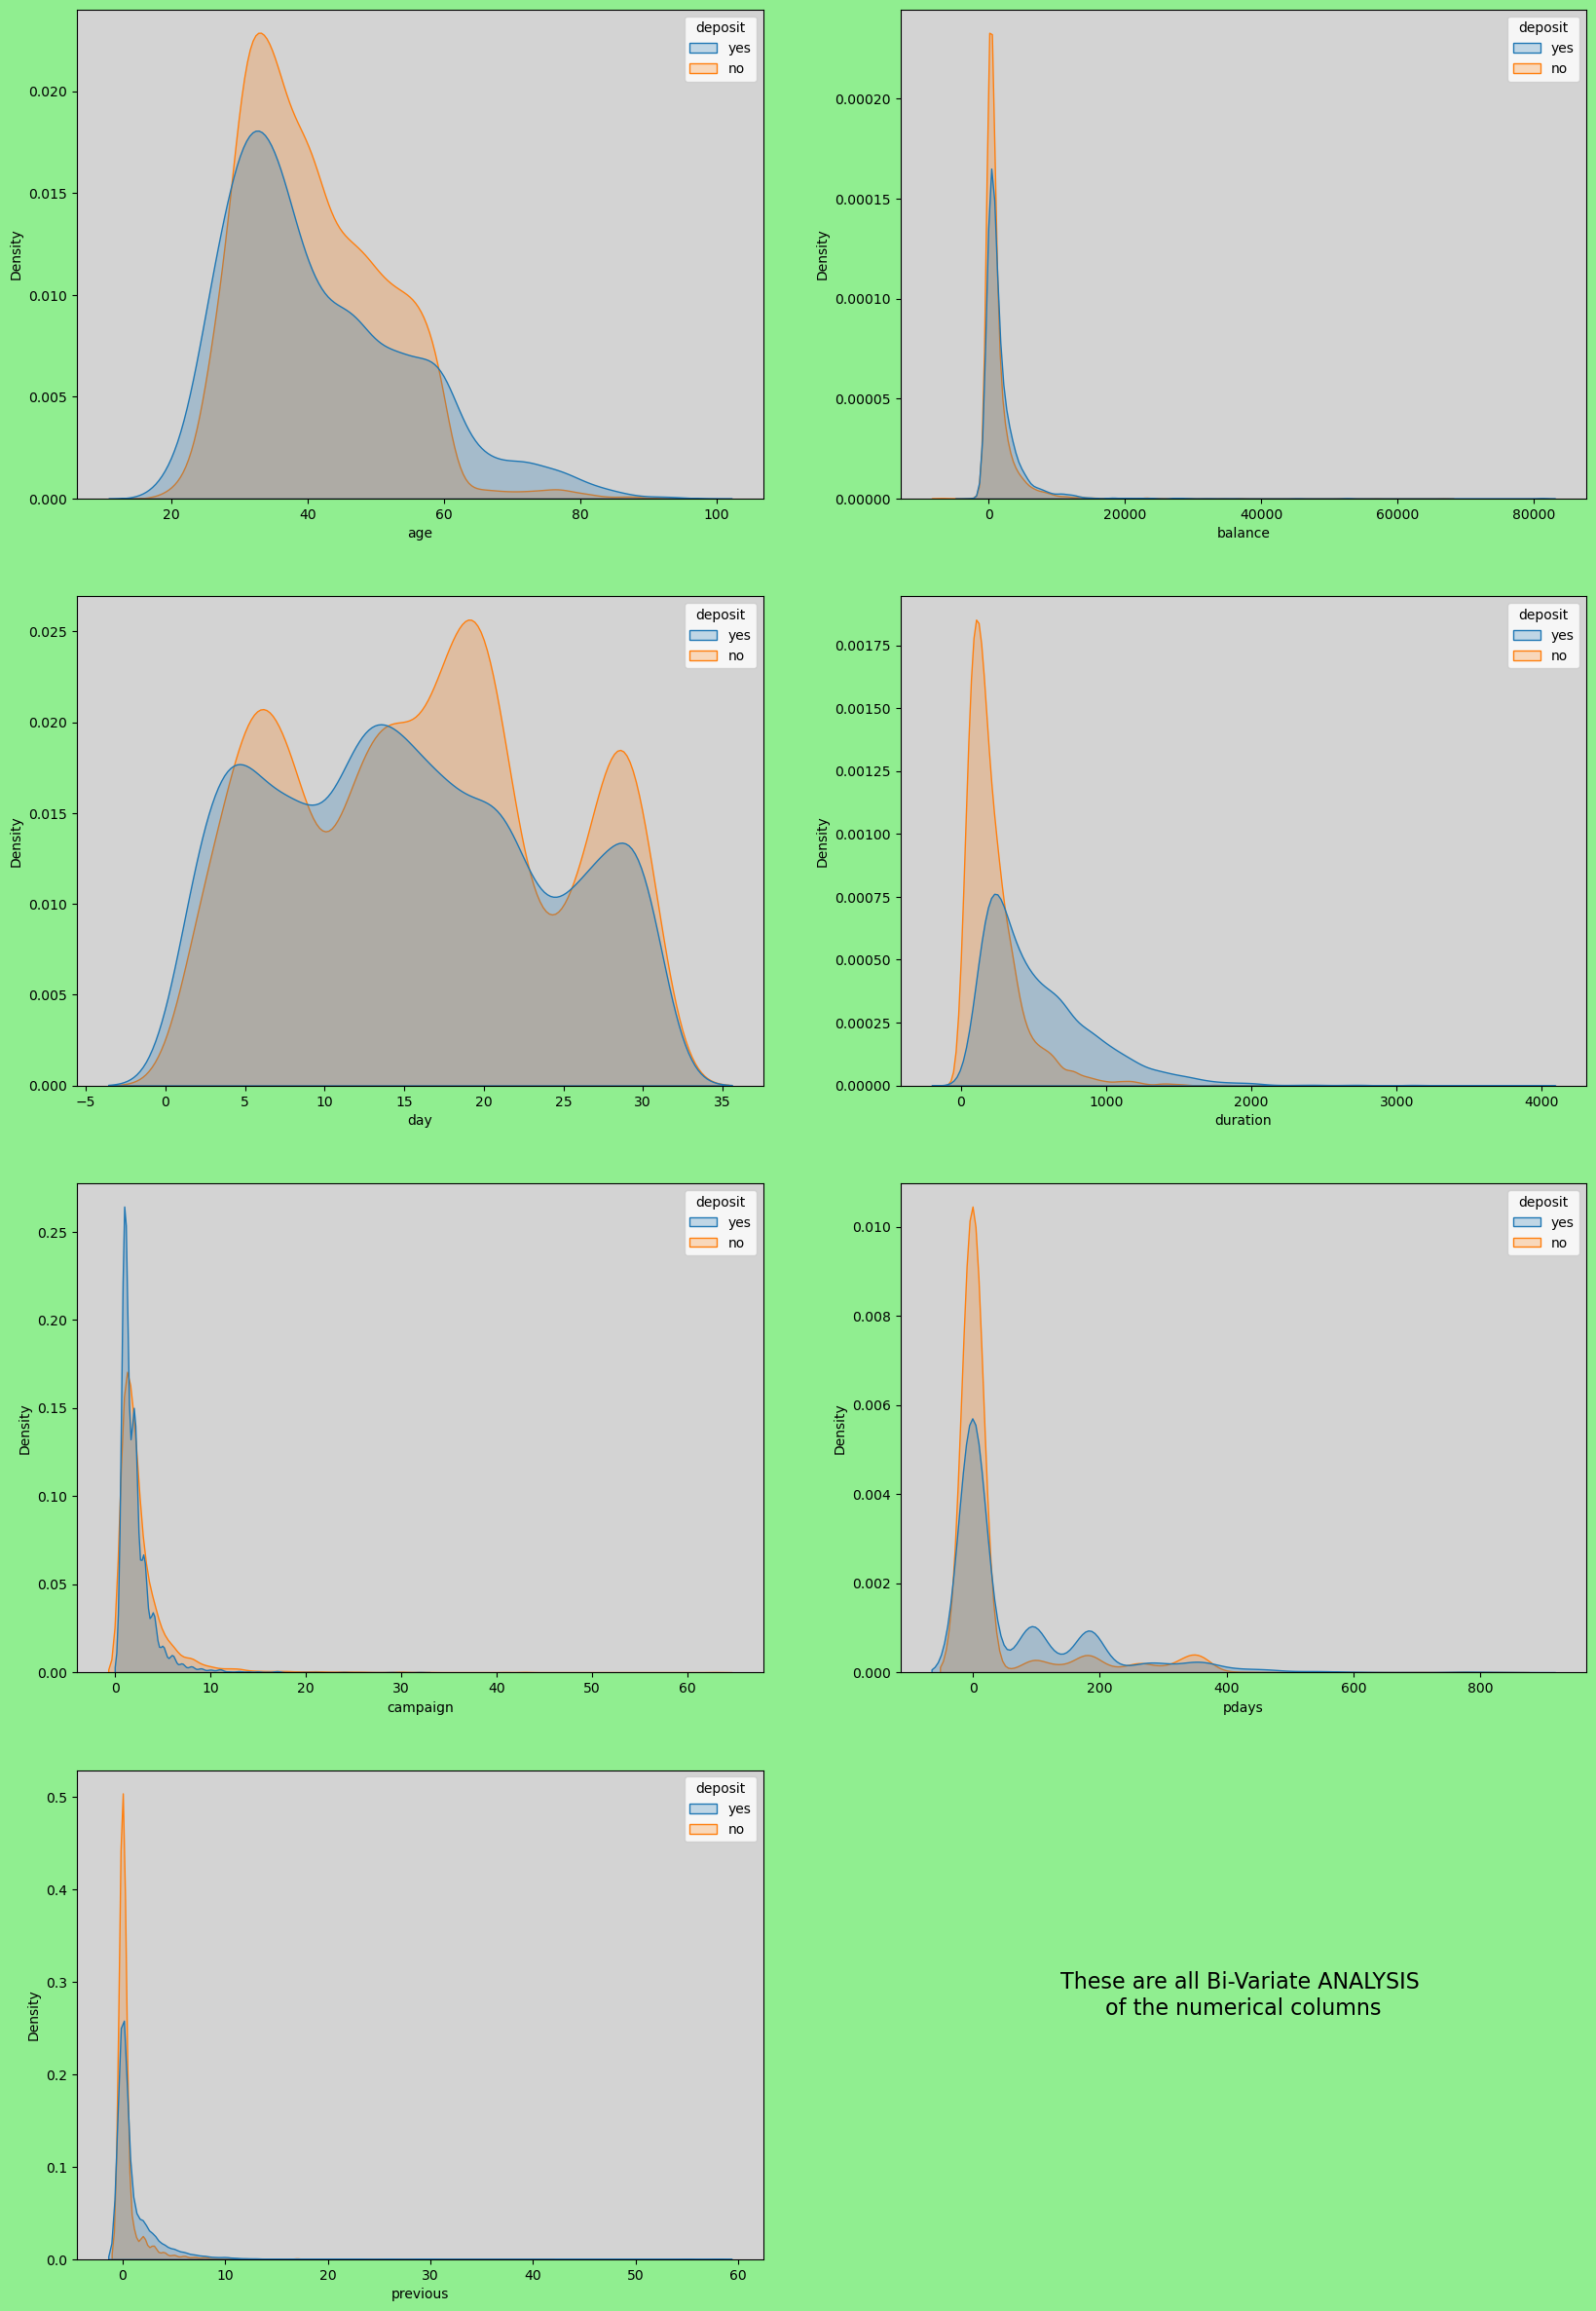

In [23]:
# lets create a kde plot for numerical columns 
fig , axes = plt.subplots(4,2,figsize =(20,30))
axes=axes.flatten()
fig.patch.set_facecolor('lightgreen')  

count_plot=0
for cols in nums_cols:
    dx=sns.kdeplot(data=data, x =data[cols],hue=data["deposit"] , ax = axes[count_plot],fill=True)
    dx.set_facecolor("lightgrey")
    count_plot+=1

axes[7].axis("off")
axes[7].text(0.5,0.5,"These are all Bi-Variate ANALYSIS \nof the numerical columns",fontsize = 16 , ha="center")
plt.show()
    

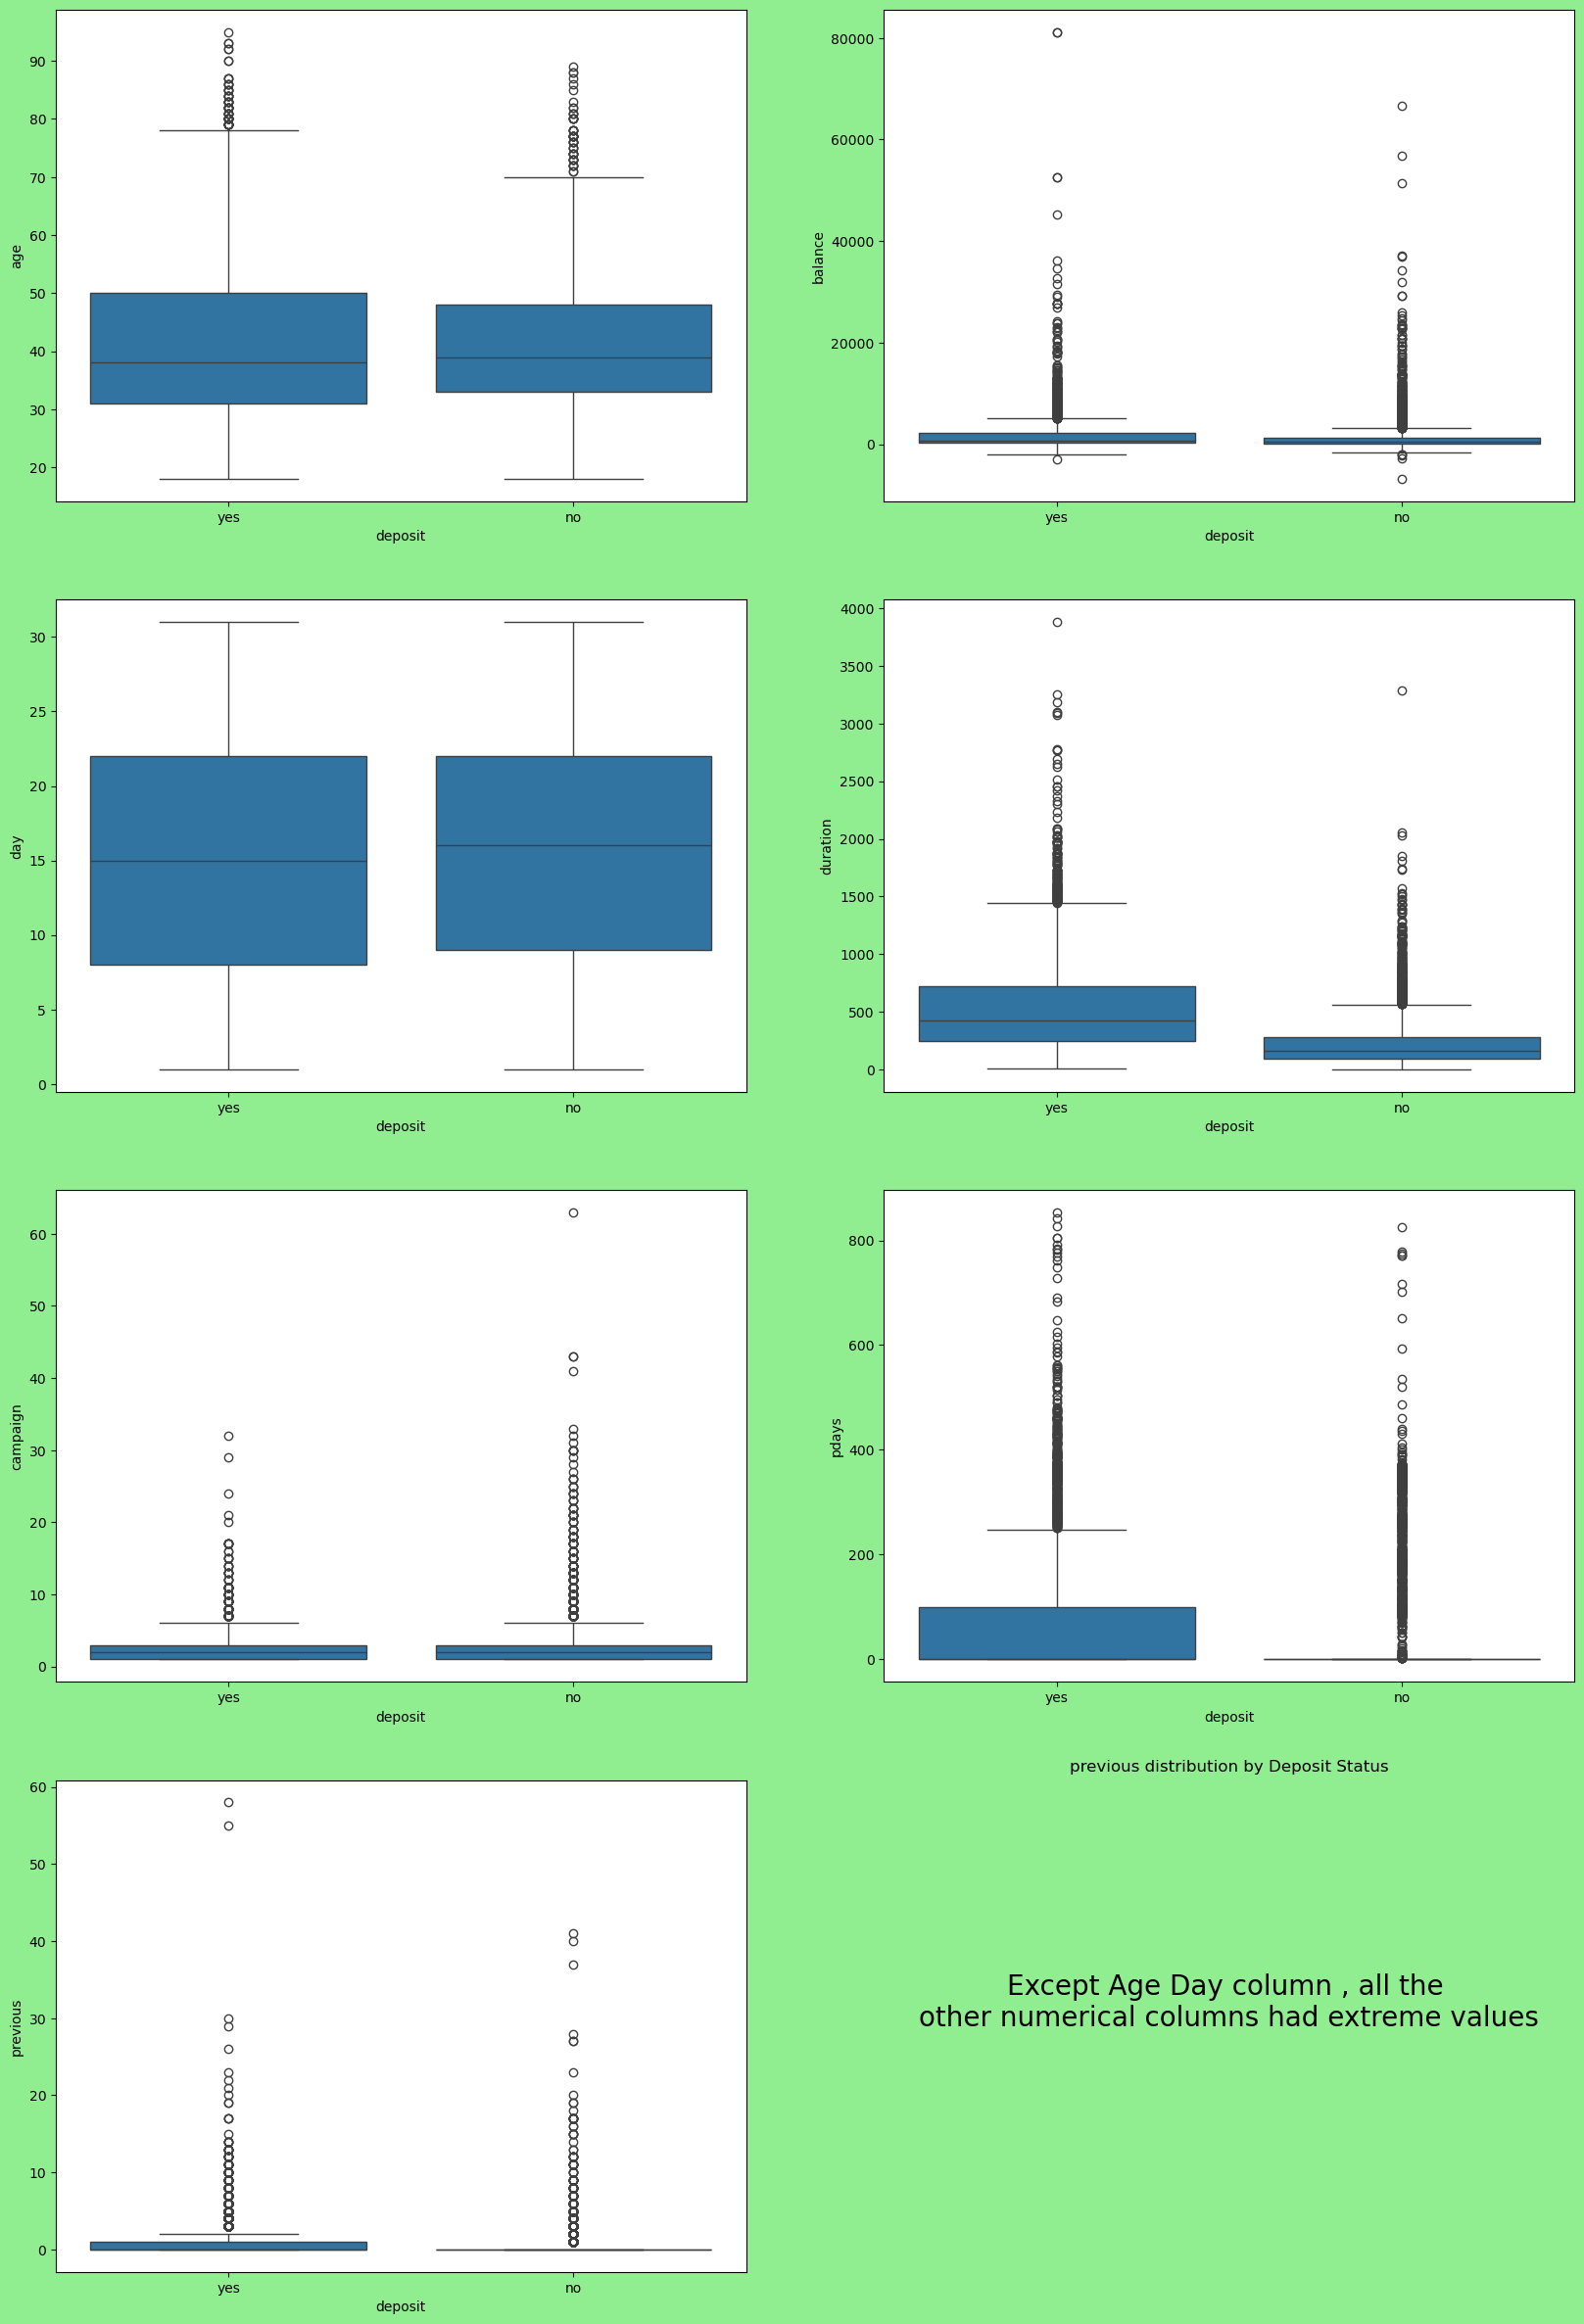

In [24]:
# lets understand the nums cols with deposit 

fig,axes = plt.subplots(4,2,figsize = (20,30))
axes =axes.flatten()
fig.patch.set_facecolor("lightgreen")

count_plt=0

for col in nums_cols:
    sns.boxplot(x="deposit", y=col, data=data , ax = axes[count_plt])
    plt.title(f"{col} distribution by Deposit Status")
    count_plt+=1
axes[7].axis("off")
axes[7].text(0.5,0.5,"Except Age Day column , all the \nother numerical columns had extreme values",ha="center",fontsize=20)

plt.show()



In [25]:
# understand the correlation with deposit (convert the to binary)

data["deposit_binary"] = data["deposit"].map({"yes": 1, "no": 0})

corr_with_deposit = data.corr(numeric_only=True)["deposit_binary"].sort_values(ascending=False)
corr_with_deposit

deposit_binary    1.000000
duration          0.451919
pdays             0.151593
previous          0.139867
balance           0.081129
age               0.034901
day              -0.056326
campaign         -0.128081
Name: deposit_binary, dtype: float64

,age,balance,day,duration,campaign,pdays,previous,deposit_binary
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit_binary,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


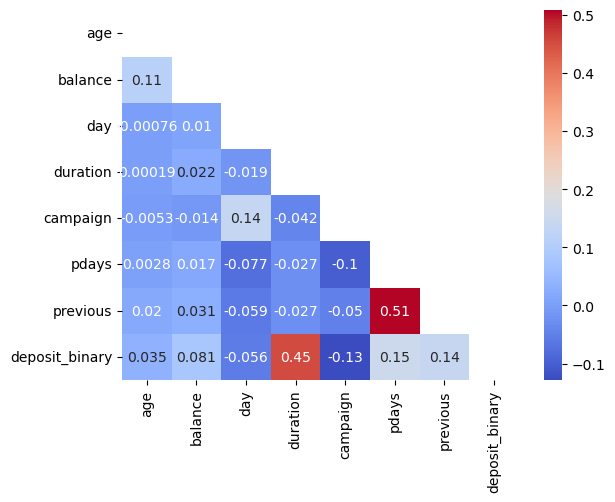

In [26]:
# understand the correlation among the columns

corr = data.corr(numeric_only=True)
mask = np.triu(np.ones(corr.shape, dtype = "bool"))
sns.heatmap(corr, annot=True,mask = mask, cmap="coolwarm")
corr


In [27]:
# focus more on the duration columns 
bins = [2,60,120,180,300,480,540,600,1200,1800,2400,3000,3600,np.inf]
labels = ["2-60","61-120","121-180","181-300","301-480","481-540","541-600","601-1200","1201-1800","1801-2400","2401-3000","3001-3600","3601+"]

data["duration_bin"] = pd.cut(data["duration"] , bins = bins , labels=labels , right = True , include_lowest = True )

duration_summary = data.groupby("duration_bin").agg(
    total_calls = ("duration", "count"),
    deposits_yes = ("deposit", lambda x: (x == "yes").sum())
).reset_index()
duration_summary["duration_deposit_percentage"] = (duration_summary["deposits_yes"]/duration_summary["total_calls"])*100
print(duration_summary)



   duration_bin  total_calls  deposits_yes  duration_deposit_percentage
0          2-60          732             9                     1.229508
1        61-120         1556           202                    12.982005
2       121-180         1648           498                    30.218447
3       181-300         2434          1122                    46.096960
4       301-480         1903          1092                    57.383079
5       481-540          389           282                    72.493573
6       541-600          348           251                    72.126437
7      601-1200         1772          1487                    83.916479
8     1201-1800          320           291                    90.937500
9     1801-2400           43            39                    90.697674
10    2401-3000           10            10                   100.000000
11    3001-3600            6             5                    83.333333
12        3601+            1             1                   100

In [28]:
# focus more on the balance columns 
bins = [data['balance'].min() - 1,1,1708,3000,5000,10000,20000,30000,40000,50000,60000,80000,np.inf]
labels  = ["below_min","1-1708","1709-3000","3001-5000","5001-10000","10001-20000","20001-30000","30000-40000","40001-50000","50001-60000","60000-80000","80001+"]
data["balance_bin"]=pd.cut(data["balance"] , bins = bins , labels= labels , right = True , include_lowest = True )

balance_summary= data.groupby(by="balance_bin").agg(
    total_count=("balance","count"),
    deposits_yes = ("deposit", lambda x :(x=="yes").sum())
).reset_index()

balance_summary["balance_deposit_percentage"]=round((balance_summary["deposits_yes"]/balance_summary["total_count"])*100,2)
balance_summary



,balance_bin,total_count,deposits_yes,balance_deposit_percentage
0,below_min,1501,519,34.58
1,1-1708,6871,3166,46.08
2,1709-3000,1212,687,56.68
3,3001-5000,807,476,58.98
4,5001-10000,543,306,56.35
5,10001-20000,171,106,61.99
6,20001-30000,41,20,48.78
7,30000-40000,8,4,50.00
8,40001-50000,1,1,100.00
9,50001-60000,4,2,50.00


In [29]:
# lets understand age with deposit 
bins = [0,18,25,35,45,60,75,90,100]
labels= ["0-18","19-25","26-35","36-45","46-60","61-75","76-90","90+"]

data["age_bin"]=pd.cut(data["age"],bins= bins , labels= labels,include_lowest =True , right=True, )

age_summary = data.groupby(by = "age_bin").agg(
    age_groups_count = ("age","count"),
    deposits_yes = ("deposit_binary","sum")
).reset_index()

age_summary["age_summary_percentage"] = round(age_summary["deposits_yes"]/ age_summary["age_groups_count"]*100,2)
age_summary


,age_bin,age_groups_count,deposits_yes,age_summary_percentage
0,0-18,8,7,87.50
1,19-25,442,313,70.81
2,26-35,3921,1869,47.67
3,36-45,3158,1301,41.20
4,46-60,3022,1297,42.92
5,61-75,458,385,84.06
6,76-90,148,112,75.68
7,90+,5,5,100.00


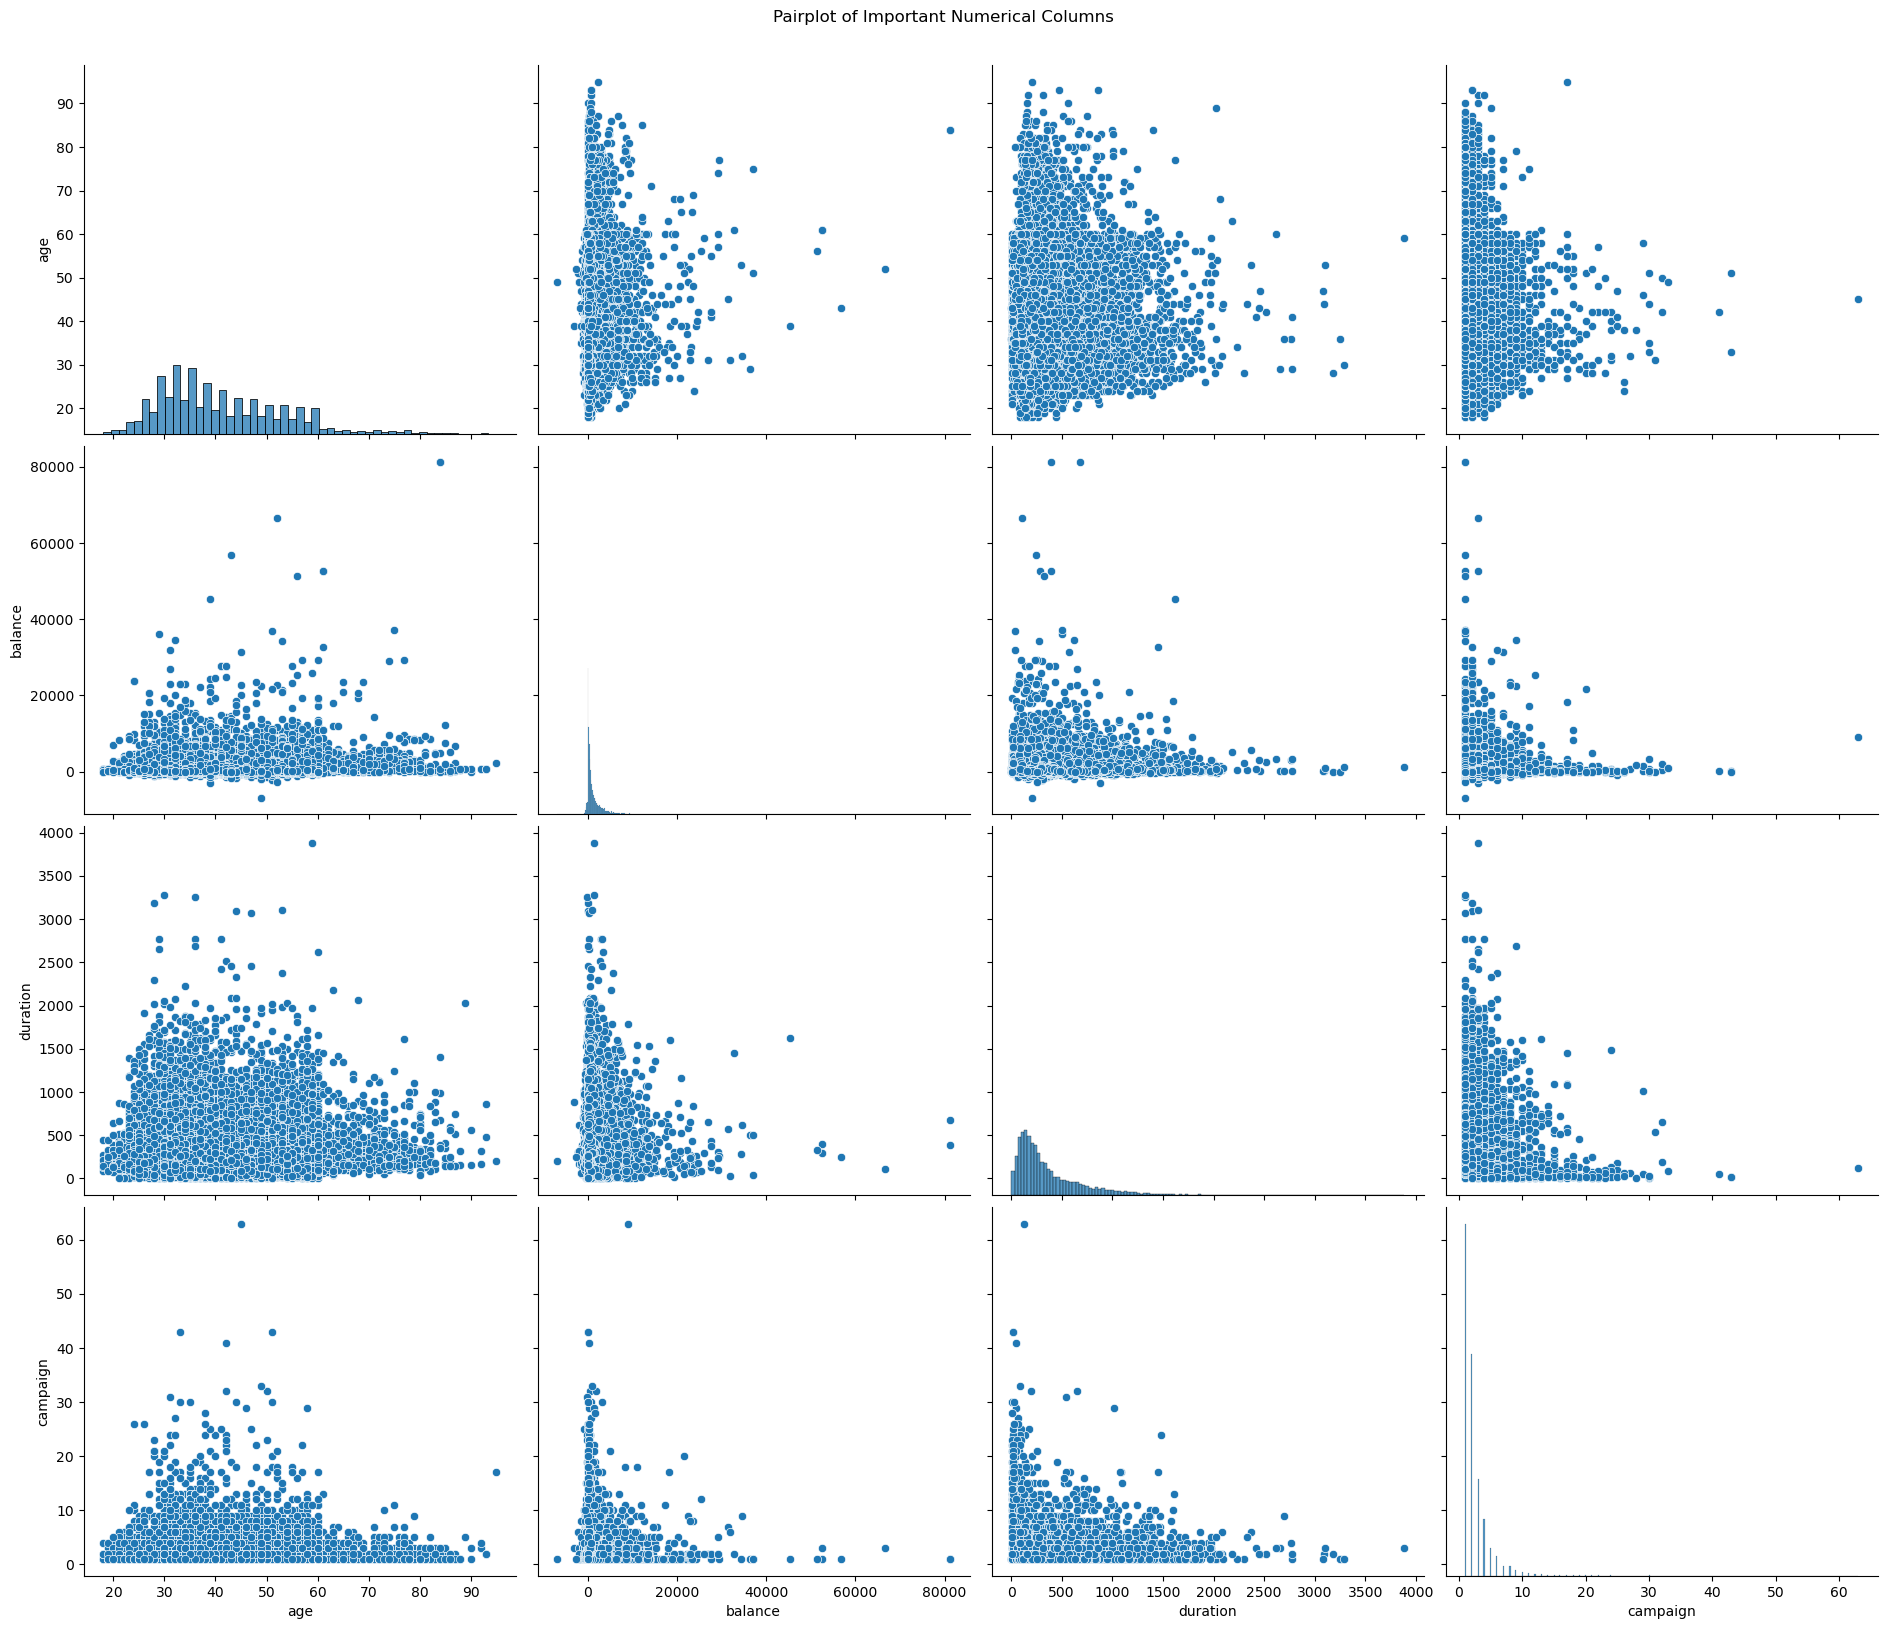

In [30]:
# lets understand the main numerical columns 
important_nums_cols = ['age', 'balance','duration', 'campaign']
sns.pairplot(data=data[important_nums_cols],height=4, aspect=1.2)
plt.suptitle("Pairplot of Important Numerical Columns", y=1.02)
plt.show()

# Observation - Bivariate analysis on numerical columns
- Duration is by far the strongest numerical predictor here.
- Negative correlation of campaign suggests too many contacts might annoy customers.
- Except Age Day column , all the \nother numerical columns had extreme values.
- The strongest link is between pdays and previous (0.507),showing a natural relationship between past contacts and days since last contact.
- Deposit success rate increases significantly with longer call durations.
- Calls under 60 seconds have about a 1% success rate, rising above 50% after 5 minutes.
- Longer conversations improve the chances of deposit conversion, highlighting the importance of strong communication.
- Clients with balances above 80,000 have a 100% deposit success rate.
- Most clients (61%) fall in the 1-1708 range, contributing 60% of total deposits.
- Deposit success improves steadily as balance increases up to 20,000.
- Clients aged 90+ and 61-75 show the highest deposit success rates at 100% and 84%, respectively.  
- Younger (19-25) and older age groups tend to have higher deposit rates, possibly due to career stage or retirement.  
- Middle-aged groups (26-60) have lower success rates, around 40-48%, indicating different financial behaviors.


### FACTORS INFLUENCE THE CLIENTS TO BUY TERM DEPOISTS

#### In simple terms
- Clients are more likely to subscribe to a term deposit if:
* They engage in longer calls,
* Have higher balances, 
* Are younger or older age groups,
* Are single,
* Have secondary/tertiary education,
* Have no credit default history,
* Have no housing loans,
* Are contacted via cellular phone,
* Have had successful prior campaigns.


# Factors Influencing Term Deposit Subscription
#### In Details

1. **Call Duration**  
   Longer calls strongly increase the chance of subscription.  
   - Calls over 5 minutes have a success rate above 50%.  
   - Calls under 1 minute have about a 1% success rate.  

2. **Client Financial Status (Balance)**  
   Clients with higher bank balances are more likely to subscribe.  
   - Those with balances over 80,000 EUR had a 100% subscription rate.  
   - Success rates increase steadily with balance, especially up to 20,000 EUR.  

3. **Age Group**  
   - Younger clients (19-25) and older clients (61+) have higher deposit success rates.  
   - Middle-aged clients (26-60) have lower success rates (~40-48%).  

4. **Marital Status**  
   - Singles have a higher subscription rate (54%) than married clients (43%).  
   - Married clients contribute more deposits overall because there are more of them.  

5. **Education Level**  
   - Secondary and tertiary educated clients make up 84% of deposits.  
   - Education likely helps clients understand term deposits better.  

6. **Credit Default History**  
   - 99% of deposits come from clients with no past credit defaults.  
   - Clients with defaults rarely subscribe to term deposits.  

7. **Loan Ownership**  
   - Clients without housing loans are more likely to subscribe.  
   - They contribute to 63% of all deposits, indicating lower debt favors subscriptions.  

8. **Contact Method**  
   - Cellular phone is the most effective way to contact clients.  
   - 83% of deposits resulted from cellular contacts with a 54% success rate.  

9. **Previous Campaign Outcomes**  
   - Clients with previous successful campaigns have a 91% subscription rate.  
   - Even clients with failed prior campaigns have a moderate 51% success rate.  
   - 75% of deposits come from clients new to the campaign.  
